# Tutorial: `hstools`

## Sample data
Sample imagery captured from a [Resonon](https://resonon.com/) Pika II VIS-NIR line scanning imager and ancillary sample files can be downloaded from this [link](https://drive.google.com/drive/folders/1KpOBB4-qghedVFd8ukQngXNwUit8PFy_?usp=sharing).

Before trying this tutorial on your own machine, please download the [sample files](https://drive.google.com/drive/folders/1KpOBB4-qghedVFd8ukQngXNwUit8PFy_?usp=sharing) and place into a local directory of your choosing (and do not change the file names). Indicate the location of your sample files by modifying `data_dir`:

In [1]:
data_dir = r'F:\\nigo0024\Documents\hs_process_demo'

***

## Confirm your environment

Before trying the tutorials, be sure `hs_process` and its dependencies are [properly installed](installation.html#). If you installed in a *virtual environment*, first check we are indeed using the Python instance that was installed with the virtual environment:

In [2]:
import sys
import hs_process
print('Python install location: {0}'.format(sys.executable))
print('Version: {0}'.format(hs_process.__version__))

Python install location: C:\Users\nigo0024\Anaconda3\envs\msi_sip\python.exe
Version: 0.0.4


The *spec* folder that contains `python.exe` tells me that the activated Python instance is indeed in the `spec` environment, just as I intend. If you created a virtual environment, but your `python.exe` is not in the `envs\spec` directory, you either did not properly create your virtual environment or you are not pointing to the correct Python installation in your IDE (e.g., Spyder, Jupyter notebook, etc.).  

***

## `hstools.clean_md_sets`
Converts metadata items that are expressed as a list to be expressed as a dictionary. [[API]](api/hs_process.hstools.html#hs_process.hstools.clean_md_sets)

Load and initialize `hsio`

In [3]:
import os
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Create sample metadata with "wavelength" expressed as a list of strings

In [4]:
metadata = {'samples': 1300,
            'lines': 617,
            'bands': 4,
            'file type': 'ENVI Standard',
            'wavelength': ['394.6', '396.6528', '398.7056',
            '400.7584']}

Clean metadata using `hstools.clean_md_sets`. Notice how wavelength is now expressed as a `str` representation of a `dict`, which is required for properly writing the metadata to the .hdr file via [save_image()](http://www.spectralpython.net/class_func_ref.html#spectral.io.envi.save_image) in Spectral Python.

In [5]:
io.tools.clean_md_sets(metadata=metadata)

{'samples': 1300,
 'lines': 617,
 'bands': 4,
 'file type': 'ENVI Standard',
 'wavelength': '{394.6, 396.6528, 398.7056, 400.7584}'}

***

##  `hstools.del_meta_item`
Deletes metadata item from SpyFile object. [[API]](api/hs_process.hstools.html#hs_process.hstools.del_meta_item)


Load and initialize `hsio`

In [6]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Create sample metadata

In [7]:
metadata = {'samples': 1300,
            'lines': 617,
            'bands': 4,
            'file type': 'ENVI Standard',
            'map info': '{UTM, 1.0, 1.0, 421356.76707299997, 4844936.7317699995, 0.04, 0.04, 15, T, WGS-84, units  meters, rotation  0.000}',
            'wavelength': ['394.6', '396.6528', '398.7056', '400.7584']}

Delete *"map info"* from `metadata` using `hstools.del_met_item`

In [8]:
io.tools.del_meta_item(metadata, 'map info')

{'samples': 1300,
 'lines': 617,
 'bands': 4,
 'file type': 'ENVI Standard',
 'wavelength': ['394.6', '396.6528', '398.7056', '400.7584']}

***

## `hstools.get_band`
Finds the band number of the closest target wavelength. [[API]](api/hs_process.hstools.html#hs_process.hstools.get_band)

Load and initialize `hsio`

In [9]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Use `hstools.get_band` to find the band number corresponding to *703 nm*

In [10]:
io.tools.get_band(703, io.spyfile)

151

***

## `hstools.get_wavelength`
Returns actual wavelength of the closest target band. [[API]](api/hs_process.hstools.html#hs_process.hstools.get_wavelength)

Load and initialize `hsio`

In [11]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Use `hstools.get_wavelength` to find the wavelength value corresponding to the *151st band*

In [12]:
io.tools.get_wavelength(151, io.spyfile)

702.52

***

## `hstools.get_center_wl`
Gets band numbers and mean wavelength from all wavelengths (or bands) in `wl_list`. [[API]](api/hs_process.hstools.html#hs_process.hstools.get_center_wl)

Load and initialize `hsio`

In [13]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Using `hstools.get_center_wl`, find the bands and *actual mean wavelength* of the bands closest to *700* and *710* nm.

In [14]:
bands, wls_mean = io.tools.get_center_wl([700, 710], wls=True)
print('Bands: {0}'.format(bands))
print('Center wavelength: {0}'.format(wls_mean))

Bands: [150, 155]
Center wavelength: 705.5992


***

## `hstools.get_band_index`
Subtracts 1 from `band_num` and returns the band index(es). [[API]](api/hs_process.hstools.html#hs_process.hstools.get_band_index)

Load and initialize `hsio`

In [15]:
from hs_process import hsio # load hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Using `hstools.get_band_index`, find the band index of the *4th*, *43rd*, and *111th* bands

In [16]:
io.tools.get_band_index([4, 43, 111])

[3, 42, 110]

***

## `hstools.get_spectral_mean`
Gets the spectral mean of a datacube from a list of bands. [[API]](api/hs_process.hstools.html#hs_process.hstools.get_spectral_mean)

Load and initialize `hsio`

In [17]:
from hs_process import hsio  # load hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Calculate the spectral mean of the datacube via `hstools.get_spectral_mean` using all bands between *800* and *840 nm*

Band list: [199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217]




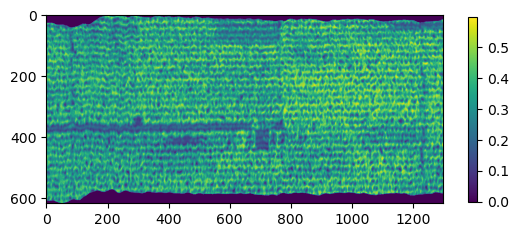

In [18]:
band_list = io.tools.get_band_range([800, 840], index=False)
array_mean = io.tools.get_spectral_mean(band_list, spyfile=io.spyfile)
print('Band list: {0}'.format(band_list))
io.show_img(array_mean)

***

## `hstools.get_band_num`
Adds 1 to ``band_idx`` and returns the band number(s). [[API]](api/hs_process.hstools.html#hs_process.hstools.get_band_num)

Load and initialize `hsio`

In [19]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Using `hstools.get_band_num`, find the band number located at the *4th*, *43rd*, and *111th* index values.

In [20]:
io.tools.get_band_num([4, 43, 111])

[5, 44, 112]

***

## `hstools.get_band_range`
Retrieves the band index or band number for all bands within a wavelength range. [[API]](api/hs_process.hstools.html#hs_process.hstools.get_band_range)

Load and initialize `hsio`

In [21]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Find the band number of all bands between *700* and *710 nm*

In [22]:
io.tools.get_band_range([700, 710], index=False, spyfile=io.spyfile)

[150, 151, 152, 153, 154]

Find the band index values of all bands between *700* and *710 nm* via `hstools.get_band_range`

In [23]:
io.tools.get_band_range([700, 710], index=True, spyfile=io.spyfile)

[149, 150, 151, 152, 153]

***

## `hstools.get_meta_set`
Reads metadata "set" (i.e., string representation of a Python set; common in .hdr files), taking care to remove leading and trailing spaces. [[API]](api/hs_process.hstools.html#hs_process.hstools.get_meta_set)

Load and initialize `hsio`

In [24]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Retrieve the *"map info" set* from the metadata via `hstools.get_meta_set`

In [25]:
io.spyfile.metadata['map info']

['UTM',
 '1.0',
 '1.0',
 '441357.287073',
 '4855944.7717699995',
 '0.04',
 '0.04',
 '15',
 'T',
 'WGS-84',
 'units  meters',
 'rotation  0.000']

***

## `hstools.get_UTM`
Calculates the new UTM coordinate of cropped plot to modify the "map info" tag of the .hdr file. [[API]](api/hs_process.hstools.html#hs_process.hstools.get_UTM)

Load and initialize `hsio`

In [26]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Retrieve UTM coordinates and pixel sizes from the metadata

In [27]:
map_info_set = io.spyfile.metadata['map info']
utm_x = io.tools.get_meta_set(map_info_set, 3)
utm_y = io.tools.get_meta_set(map_info_set, 4)
spy_ps_e = float(map_info_set[5])
spy_ps_n = float(map_info_set[6])

Calculate the UTM coordinates at the *100th easting pixel* and *50th northing pixel* using `hstools.get_UTM`

In [28]:
ul_x_utm, ul_y_utm = io.tools.get_UTM(100, 50, utm_x, utm_y, spy_ps_e, spy_ps_n)
print('100th easting pixel/50th northing pixel x: {0}'.format(ul_x_utm))
print('100th easting pixel/50th northing pixel y: {0}'.format(ul_y_utm))

100th easting pixel/50th northing pixel x: 441361.32707299996
100th easting pixel/50th northing pixel y: 4855942.7317699995


***

## `hstools.load_spyfile`
Loads a `SpyFile` (Spectral Python object) for data access and/or manipulation by the `hstools` class. [[API]](api/hs_process.hstools.html#hs_process.hstools.load_spyfile)

Load and initialize `hsio`

In [29]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Load a new datacube using `hstools.load_spyfile`

In [30]:
io.tools.load_spyfile(io.spyfile)
io.tools.spyfile

	Data Source:   'F:\\nigo0024\Documents\hs_process_demo\Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip'
	# Rows:            617
	# Samples:        1300
	# Bands:           240
	Interleave:        BIP
	Quantization:  32 bits
	Data format:   float32

***

## `hstools.mask_array`
Creates a masked numpy array based on a threshold value. If `array` is already a masked array, that mask is maintained and the new mask(s) is/are added to the original mask. [[API]](api/hs_process.hstools.html#hs_process.hstools.mask_array)

Load and initialize `hsio`

In [31]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Retrieve the image band at *800 nm* using `hstools.get_band` and `hsio.spyfile.open_memmap`

In [32]:
band = io.tools.get_band(800)
array = io.spyfile.open_memmap()[:, :, band]

Create a masked array of all values below the *75th percentile* via `hstools.mask_array`

In [33]:
array_mask, metadata = io.tools.mask_array(array, io.spyfile.metadata, percentile=75, side='lower')

See that the *"history"* tage in the `metadata` has been modified

In [34]:
metadata['history'][-158:]

"hs_process.mask_array[<label: 'thresh?' value:None; label: 'percentile?' value:75; label: 'side?' value:lower; label: 'unmasked_pct?' value:24.9935170178282>]"

Visualize the unmasked array using `hsio.show_img`. Set `vmin` and `vmax` to ensure the same color scale is used in comparing the masked vs. unmasked arrays.

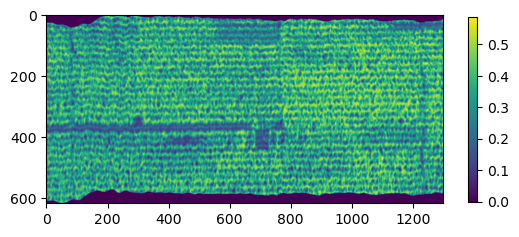

In [35]:
vmin = array.min()
vmax = array.max()
io.show_img(array, vmin=vmin, vmax=vmax)

Visualize the unmasked array using `hsio.show_img`

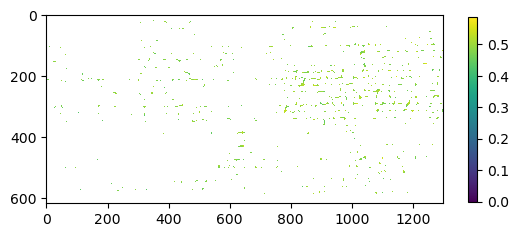

In [36]:
io.show_img(array_mask, vmin=vmin, vmax=vmax)

***

## `hstools.mean_datacube`
Calculates the mean spectra for a datcube; if `mask` is passed (as a `numpy.ndarray`), then the mask is applied to `spyfile` prior to computing the mean spectra. [[API]](api/hs_process.hstools.html#hs_process.hstools.mean_datacube)

Load and initialize `hsio`

In [37]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Retrieve the image band at *800 nm* using `hstools.get_band` and `hsio.spyfile.open_memmap`, then mask out all pixels whose value falls below the *75th percentile*.

In [38]:
band = io.tools.get_band(800)
array = io.spyfile.open_memmap()[:, :, band]
array_mask, metadata = io.tools.mask_array(array, io.spyfile.metadata, percentile=75, side='lower')

Calculate the spectral mean from the remaining *(i.e., unmasked)* pixels using `hstools.mean_datacube`.

In [39]:
spec_mean, spec_std, datacube_masked = io.tools.mean_datacube(io.spyfile, mask=array_mask)

Save using `hsio.write_spec` and `hsio.write_cube`, then load into Spectronon software for visualization.

In [40]:
fname_hdr_spec = os.path.join(data_dir, 'hstools', 'Wells_rep2_20180628_16h56m_pika_gige_7-mean_800nm_75th.spec.hdr')
fname_hdr_cube = os.path.join(data_dir, 'hstools', 'Wells_rep2_20180628_16h56m_pika_gige_7-mean_800nm_75th.bip.hdr')
if not os.path.isdir(os.path.dirname(fname_hdr_spec)):  # create a new folder named "hstools" if it does not exist
    os.mkdir(os.path.dirname(fname_hdr_spec))

io.write_spec(fname_hdr_spec, spec_mean, spec_std, metadata=metadata, force=True)
io.write_cube(fname_hdr_cube, datacube_masked, metadata=metadata, force=True)

Load the mean datacube and spectra into Spectronon for visualization:
![mean_datacube](../.././docs/source/img/utilities/mean_datacube.png)

***

## `hstools.modify_meta_set`
Modifies metadata "set" (i.e., string representation of a Python set; common in .hdr files) by converting string to list, then adjusts the value of an item by its index. [[API]](api/hs_process.hstools.html#hs_process.hstools.modify_meta_set)

Load and initialize `hsio`

In [41]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Retrieve the *"map info" set* from the metadata via `hstools.get_meta_set`

In [42]:
map_info_set = io.spyfile.metadata['map info']
map_info_set

['UTM',
 '1.0',
 '1.0',
 '441357.287073',
 '4855944.7717699995',
 '0.04',
 '0.04',
 '15',
 'T',
 'WGS-84',
 'units  meters',
 'rotation  0.000']

Modify the value at *index position 4* from `4855944.7717699995` to `441300.2` using `hstools.modify_meta_set`.

In [43]:
io.tools.modify_meta_set(map_info_set, idx=4, value=441300.2)

'{UTM, 1.0, 1.0, 441357.287073, 441300.2, 0.04, 0.04, 15, T, WGS-84, units  meters, rotation  0.000}'

***

## `hstools.plot_histogram`
Plots a histogram with the percentile value labeled. [[API]](api/hs_process.hstools.html#hs_process.hstools.plot_histogram)

Load and initialize `hsio`

In [44]:
from hs_process import hsio

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)

Retrieve the image band at *800 nm* using `hstools.get_band` and `hsio.spyfile.open_memmap`

In [45]:
band = io.tools.get_band(800)
array = io.spyfile.open_memmap()[:, :, band]

Create a masked array of all values below the *5th percentile* via `hstools.mask_array`

In [46]:
array_mask, metadata = io.tools.mask_array(array, io.spyfile.metadata, percentile=5, side='lower')

Visualize the histogram of the unmasked pixels (i.e., those greater than the 5th percentile) using `hstools.plot_histogram`

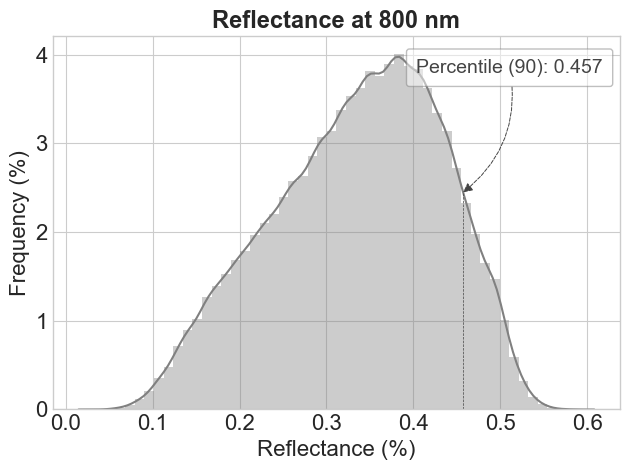

In [47]:
title = 'Reflectance at 800 nm'
xlabel = 'Reflectance (%)'
fig = io.tools.plot_histogram(array_mask, title=title, xlabel=xlabel)